In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot model forecast avaibility
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns


from esio import EsioData as ed
from esio import ice_plot

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  F

In [ ]:
# Amazingly slow should be possible to simplify or improve efficiency

In [2]:
# Define models and variables to plot
runType = 'forecast'
variables = ['sic']

In [3]:
# def plot_availability(cm):
#     f = plt.figure(figsize=(20,4))
#     plt.title(E.model[cm.model.item()]['model_label'])
#     plt.pcolormesh(cm.fore_time.values.astype('timedelta64[D]').astype('int'), cm.init_time,  cm.data, cmap=cmap )
#     cbar = plt.colorbar()
#     cbar.set_ticks([0.25, 0.75])
#     cbar.set_ticklabels(['Not Available', 'Available'])
#     plt.gcf().autofmt_xdate()
#     plt.xlabel('Forecast Lead (Days)')
#     plt.ylabel('Initialization Date')
#     return f

In [6]:
ctime = np.datetime64(datetime.datetime.now())
lag_time_30days = ctime - np.timedelta64(30, 'D')


In [23]:
#############################################################
# Load in Data
#############################################################
E = ed.EsioData.load()

cvar = 'sic'
fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar)
models_2_plot = list(E.model.keys())
models_2_plot = [x for x in models_2_plot if x not in ['dampedAnomalyTrend','MME','MME_NEW']] # remove some models


<Figure size 1440x864 with 0 Axes>

Plotting model  gfdlsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  piomas
Skipping model piomas no forecast files found.
Plotting model  yopp


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ukmetofficesipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ecmwfsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  bom


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  cma


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ecmwf


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  hcmr


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  isaccnr


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  jma


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  metreofr


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ukmo


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  eccc


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  kma


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ncep


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  usnavysipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  usnavyncep


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  rasmesrl


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  noaasipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  noaasipn_ext
Skipping model noaasipn_ext no forecast files found.
Plotting model  usnavygofs


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  modcansipns_3


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  modcansipns_4


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  uclsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  szapirosipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  awispin


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  nicosipn


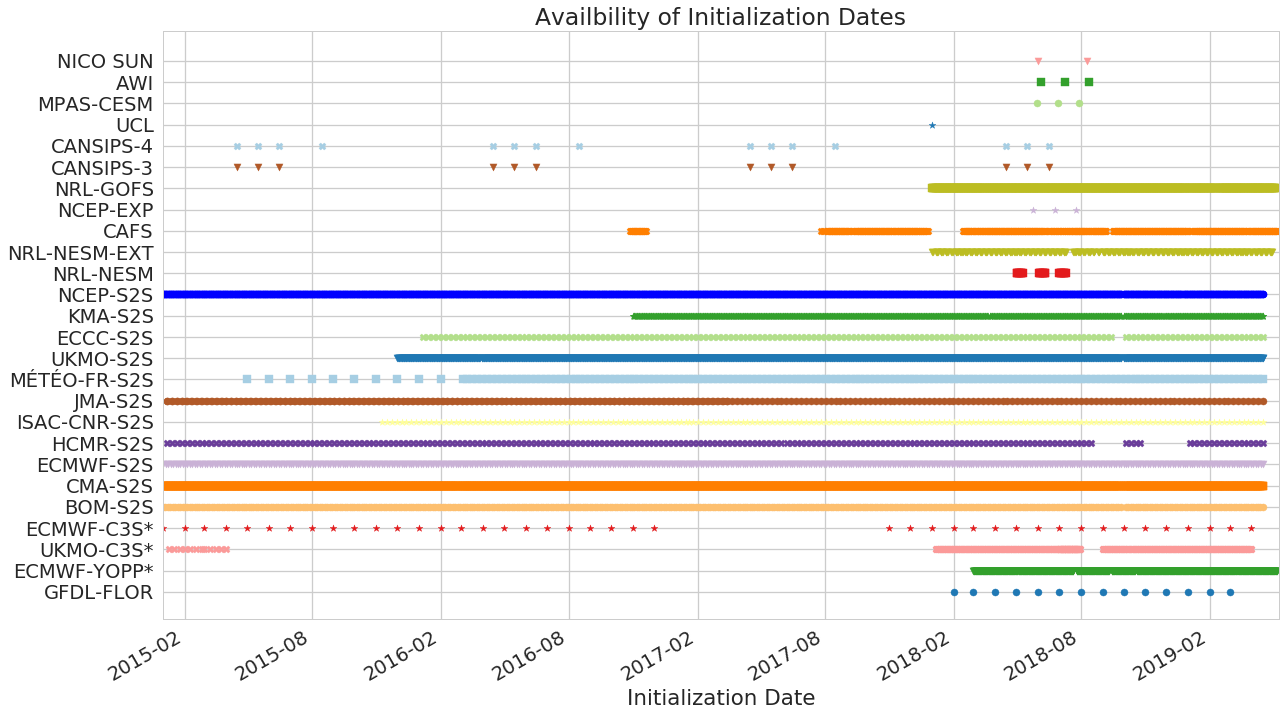

In [39]:
yticks1 = []
yticklabels1 = []
yshift = 0
# Plot simple time line of init_times
f = plt.figure(figsize=(20,12))
for (i_cm, c_model) in enumerate(models_2_plot):
#for (i_cm, c_model) in enumerate(models_2_plot[0:4]):
    print("Plotting model ", c_model)
    # Load in Model
    model_forecast = os.path.join(E.model[c_model][runType]['sipn_nc'], '*.nc')
    # Check we have files 
    files = glob.glob(model_forecast)
    if not files:
        print("Skipping model", c_model, "no forecast files found.")
        continue # Skip this model
    ds_model = xr.open_mfdataset(model_forecast, concat_dim='init_time')
    ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)

    # Set attributes
#         ds_model.attrs['model_label'] = E.model[c_model]['model_label']

    # Select var of interest
    ds_model = ds_model[cvar]

    # Get model plotting specs
    cc = E.model_color[c_model]
    cm = E.model_marker[c_model]

    x = ds_model.init_time.values
    y = yshift*np.ones(len(x), dtype = int)
    clabel = E.model[c_model]['model_label']
    clabel = ''.join(clabel.splitlines()) # remove any returns
    plt.scatter(x, y, s=50, 
                    facecolors=cc, edgecolors=cc, 
                    marker=cm, label=clabel)
    yticks1.append(yshift)
    yticklabels1.append(E.model[c_model]['model_label'])
    yshift = yshift + 1

plt.xlim([datetime.datetime(2015,1,1), ctime])
plt.gcf().autofmt_xdate()
plt.xlabel('Initialization Date')
plt.gca().set_yticks(yticks1)
plt.gca().set_yticklabels(yticklabels1)
f.savefig(os.path.join(fig_dir,'Init_avail.png'),bbox_inches='tight',dpi=200)
plt.title('Availbility of Initialization Dates')


Plotting model  gfdlsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  piomas
Skipping model piomas no forecast files found.
Plotting model  yopp


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ukmetofficesipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ecmwfsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  bom


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  cma


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ecmwf


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  hcmr


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  isaccnr


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  jma


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  metreofr


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ukmo


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  eccc


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  kma


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  ncep


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  usnavysipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  usnavyncep


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  rasmesrl


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  noaasipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  noaasipn_ext
Skipping model noaasipn_ext no forecast files found.
Plotting model  usnavygofs


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  modcansipns_3


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  modcansipns_4


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  uclsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  szapirosipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  awispin


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The inplace argument has been deprecated and will be removed in xarray 0.12.0.


Plotting model  nicosipn


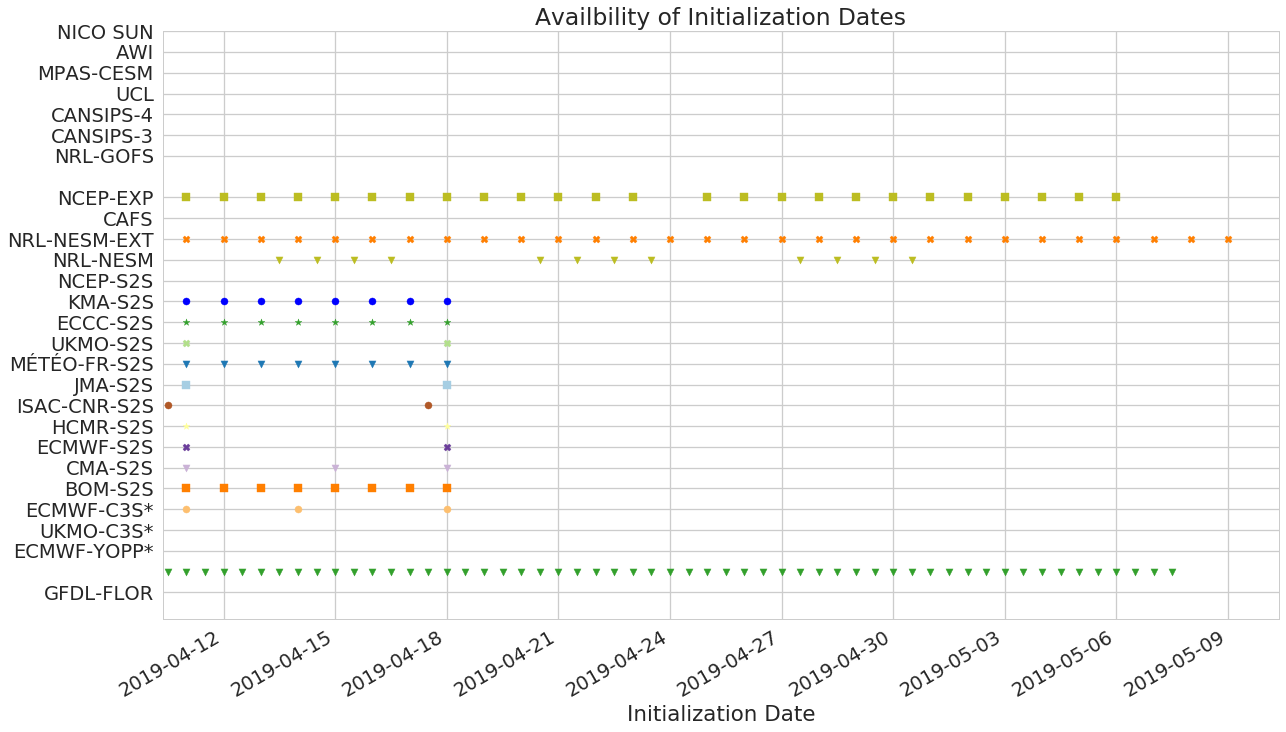

In [40]:
# Plot simple time line of init_times
f = plt.figure(figsize=(20,12))
yticks1 = []
yticklabels1 = []
yshift = 0
for (i_cm, c_model) in enumerate(models_2_plot):
# for (i_cm, c_model) in enumerate(['ukmo','gfdlsipn']):
    print("Plotting model ", c_model)
    # Load in Model
    model_forecast = os.path.join(E.model[c_model][runType]['sipn_nc'], '*.nc')
    # Check we have files 
    files = glob.glob(model_forecast)
    if not files:
        print("Skipping model", c_model, "no forecast files found.")
        continue # Skip this model
    ds_model = xr.open_mfdataset(model_forecast, concat_dim='init_time')
    ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)

    # Set attributes
#         ds_model.attrs['model_label'] = E.model[c_model]['model_label']

    # Select var of interest
    ds_model = ds_model[cvar]

    # Get model plotting specs
    cc = E.model_color[c_model]
    cm = E.model_marker[c_model]

    x = ds_model.init_time.values
    y = yshift*np.ones(len(x), dtype = int)
    clabel = E.model[c_model]['model_label']
    clabel = ''.join(clabel.splitlines()) # remove any returns
    plt.scatter(x, y, s=50, 
                    facecolors=cc, edgecolors=cc, 
                    marker=cm, label=clabel)
    yticks1.append(yshift)
    yticklabels1.append(E.model[c_model]['model_label'])
    yshift = yshift + 1


plt.xlim([lag_time_30days,ctime])
plt.gcf().autofmt_xdate()
plt.xlabel('Initialization Date')
plt.gca().set_yticks(yticks1)
plt.gca().set_yticklabels(yticklabels1)
f.savefig(os.path.join(fig_dir,'Init_avail_recent.png'),bbox_inches='tight',dpi=200)
plt.title('Availbility of Initialization Dates')

In [8]:
# # Recent init_time VS. fore_time plot
# c_xlim = [datetime.datetime.now() - datetime.timedelta(days=30), 
#           datetime.datetime.now() + datetime.timedelta(days=30*6)]
# c_ylim = [datetime.datetime.now() - datetime.timedelta(days=60), 
#           datetime.datetime.now() - datetime.timedelta(days=1)]
# for cvar in variables:

#     fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar)
#     if not os.path.exists(fig_dir):
#         os.makedirs(fig_dir)
    
#     f = plt.figure(figsize=(20,10))
#     for c_model in E.model.keys():
# #     for c_model in ['yopp','gfdlsipn']:
#         print("Plotting model ", c_model)
#         # Load in Model
#         model_forecast = os.path.join(E.model[c_model][runType]['sipn_nc'], '*.nc')
#         # Check we have files 
#         files = glob.glob(model_forecast)
#         if not files:
#             print("Skipping model", c_model, "no forecast files found.")
#             continue # Skip this model
#         ds_model = xr.open_mfdataset(model_forecast, concat_dim='init_time')
#         ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)

#         # Set attributes
#         ds_model.attrs['model_label'] = E.model[c_model]['model_label']

#         # Select var of interest
#         ds_model = ds_model[cvar]

#         # Check if any data for each init/fore time
#         #ds_model = ds_model.notnull().any(dim='x').any(dim='y').astype('int')
#         ds_model['valid_time'] = ds_model.init_time + ds_model.fore_time

#         # Plot
#         cc = E.model_color[c_model]
#         cl = E.model_linestyle[c_model]
#         haslabel = False
#         for it in ds_model.init_time:
#             if haslabel:
#                 clabel = '_nolegend_'
#             else:
#                 clabel = E.model[c_model]['model_label']
                
#             x = ds_model.sel(init_time=it).valid_time.values
#             y = [ds_model.sel(init_time=it).init_time.values for k in np.arange(0,x.size)]
#             plt.plot([x[0],x[-1]], [y[0],y[-1]], color=cc, label=clabel, linestyle=cl)
# #             plt.scatter(x, y, s=50, 
# #                         facecolors=cc, edgecolors=cc, 
# #                         label=clabel, marker=cmarker)
#             haslabel = True

#     plt.xlim(c_xlim)
#     plt.ylim(c_ylim)
#     plt.gcf().autofmt_xdate()
#     plt.xlabel('Valid Date')
#     plt.ylabel('Initialization Date')
#     #plt.axis('tight')
#     plt.legend(ncol=int(len(E.model.keys())/4), loc='upper left', bbox_to_anchor=(0, -0.5))
#     # End of all models
#     f.savefig(os.path.join(fig_dir,'DataAvailable_'+cvar+'.png'),bbox_inches='tight',dpi=200)
# #     mpld3.save_html(f, os.path.join(fig_dir,'DataAvailable_'+cvar+'.html'))